<a href="https://colab.research.google.com/github/Jihanablh/Bootcamp_DQLab/blob/main/Data_Science_in_Marketing_Customer_Segmentation_with_Python_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mencari Jumlah Cluster yang Optimal**

Penentuan jumlah cluster optimal dilakukan dengan metode Elbow, yaitu mengukur nilai cost (biaya) dari model K-Prototypes pada berbagai jumlah cluster yang diuji. Visualisasi grafik Elbow memperlihatkan titik di mana penurunan cost mulai melambat, sehingga dipilih lima cluster sebagai jumlah optimal untuk segmentasi pelanggan yang akurat dan efisien.

In [48]:
!pip install kmodes

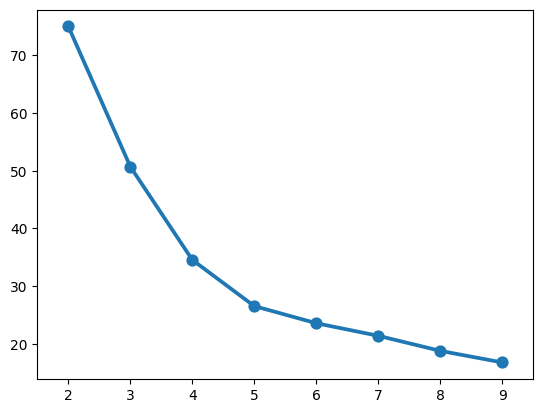

In [49]:
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df_model = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/df-customer-segmentation.csv')

# Melakukan Iterasi untuk Mendapatkan nilai Cost
cost = {}
for k in range(2,10):
    kproto = KPrototypes(n_clusters = k,random_state=75)
    kproto.fit_predict(df_model, categorical=[0,1,2])
    cost[k]= kproto.cost_

# Memvisualisasikan Elbow Plot
sns.pointplot(x=list(cost.keys()), y=list(cost.values()))
plt.show()

# **Membuat dan Menyimpan Model Clustering**

Setelah jumlah cluster optimal ditentukan, model K-Prototypes dengan lima cluster dibuat dan dilatih menggunakan data pelanggan yang telah diproses. Model ini kemudian disimpan secara permanen menggunakan pickle agar dapat digunakan kembali untuk prediksi dan analisis selanjutnya tanpa perlu pelatihan ulang.

In [50]:
import pickle
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes

kproto = KPrototypes(n_clusters=5, random_state = 75)
kproto = kproto.fit(df_model, categorical=[0,1,2])

#Save Model
pickle.dump(kproto, open('cluster.pkl', 'wb'))

# **Menggunakan Model untuk Prediksi Segmentasi Pelanggan**

Model yang telah dibuat digunakan untuk memprediksi segmen masing-masing pelanggan berdasarkan data atribut numerik dan kategorikal. Hasil prediksi ini kemudian digabungkan dengan data asli pelanggan sehingga setiap pelanggan memiliki label cluster yang memudahkan analisis dan pengambilan keputusan bisnis.

In [51]:
import pandas as pd
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes

df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/customer_segments.txt", sep="\t")

df_model = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/df-customer-segmentation.csv')

kproto = KPrototypes(n_clusters=5, random_state=75)
kproto = kproto.fit(df_model, categorical=[0, 1, 2])

# Menentukan segmen tiap pelanggan
clusters = kproto.predict(df_model, categorical=[0, 1, 2])
print('segmen pelanggan: {}\n'.format(clusters))

# Menggabungkan data awal dan segmen pelanggan
df_final = df.copy()
df_final['cluster'] = clusters
print(df_final.head())

segmen pelanggan: [3 1 2 2 0 4 3 2 4 4 2 2 3 3 0 4 4 2 0 1 0 2 4 0 0 2 0 4 2 2 1 3 1 0 4 0 4
 3 4 1 4 0 4 0 4 0 2 3 4 3]

  Customer_ID       Nama Pelanggan Jenis Kelamin  Umur       Profesi  \
0    CUST-001         Budi Anggara          Pria    58    Wiraswasta   
1    CUST-002     Shirley Ratuwati        Wanita    14       Pelajar   
2    CUST-003         Agus Cahyono          Pria    48  Professional   
3    CUST-004     Antonius Winarta          Pria    53  Professional   
4    CUST-005  Ibu Sri Wahyuni, IR        Wanita    41    Wiraswasta   

  Tipe Residen  NilaiBelanjaSetahun  cluster  
0       Sector              9497927        3  
1      Cluster              2722700        1  
2      Cluster              5286429        2  
3      Cluster              5204498        2  
4      Cluster             10615206        0  


# **Menampilkan Data Pelanggan Berdasarkan Cluster**

Data pelanggan yang sudah diberi label cluster ditampilkan secara terpisah sesuai dengan masing-masing cluster. Hal ini memberikan gambaran jelas mengenai karakteristik pelanggan di setiap segmen, sehingga perusahaan dapat memahami profil dan kebutuhan tiap kelompok pelanggan dengan lebih baik.

In [52]:
import pandas as pd
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes

df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/customer_segments.txt", sep="\t")

df_model = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/df-customer-segmentation.csv')

kproto = KPrototypes(n_clusters=5, random_state=75)
kproto = kproto.fit(df_model, categorical=[0,1,2])

clusters = kproto.predict(df_model, categorical=[0,1,2])

df_final = df.copy()
df_final['cluster'] = clusters

# Menampilkan data pelanggan berdasarkan cluster nya
for i in range(0, 5):
    print('\nPelanggan cluster: {}\n'.format(i))
    print(df_final[df_final['cluster'] == i])


Pelanggan cluster: 0

   Customer_ID       Nama Pelanggan Jenis Kelamin  Umur     Profesi  \
4     CUST-005  Ibu Sri Wahyuni, IR        Wanita    41  Wiraswasta   
14    CUST-015     Shirley Ratuwati        Wanita    20  Wiraswasta   
18    CUST-019         Mega Pranoto        Wanita    32  Wiraswasta   
20    CUST-021     Lestari Fabianto        Wanita    38  Wiraswasta   
23    CUST-024        Putri Ginting        Wanita    39  Wiraswasta   
24    CUST-025       Julia Setiawan        Wanita    29  Wiraswasta   
26    CUST-027        Grace Mulyati        Wanita    35  Wiraswasta   
33    CUST-034       Deasy Arisandi        Wanita    21  Wiraswasta   
35    CUST-036       Ni Made Suasti        Wanita    30  Wiraswasta   
41    CUST-042         Yuliana Wati        Wanita    26  Wiraswasta   
43    CUST-044                 Anna        Wanita    18  Wiraswasta   
45    CUST-046         Elfira Surya        Wanita    25  Wiraswasta   

   Tipe Residen  NilaiBelanjaSetahun  cluster  
4    

# **Visualisasi Hasil Clustering dengan Box Plot**

Box plot digunakan untuk memvisualisasikan distribusi variabel numerik seperti umur dan nilai belanja setahun pada setiap cluster. Visualisasi ini membantu mengidentifikasi perbedaan karakteristik utama antar segmen pelanggan secara kuantitatif dan mudah dipahami.

/tmp/ipython-input-53-3705226250.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='cluster', y=i, data=df_final, palette=palette)


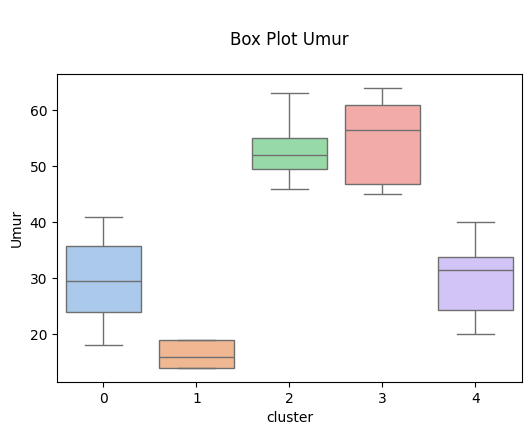

/tmp/ipython-input-53-3705226250.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='cluster', y=i, data=df_final, palette=palette)


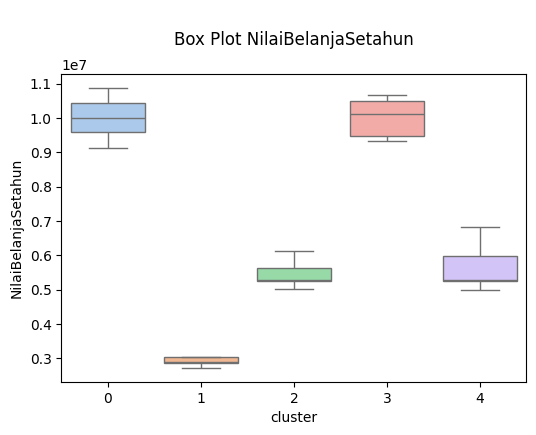

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes

# Load data
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/customer_segments.txt", sep="\t")
df_model = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/df-customer-segmentation.csv")

# Clustering
kproto = KPrototypes(n_clusters=5, random_state=75)
kproto = kproto.fit(df_model, categorical=[0,1,2])
clusters = kproto.predict(df_model, categorical=[0,1,2])

# Gabungkan hasil klaster ke data asli
df_final = df.copy()
df_final['cluster'] = clusters

# Data numerik yang ingin divisualisasikan
kolom_numerik = ['Umur', 'NilaiBelanjaSetahun']

# Warna pastel berbeda per cluster
palette = sns.color_palette("pastel", n_colors=5)

# Plot
for i in kolom_numerik:
    plt.figure(figsize=(6, 4))
    ax = sns.boxplot(x='cluster', y=i, data=df_final, palette=palette)
    plt.title('\nBox Plot {}\n'.format(i), fontsize=12)
    plt.show()

# **Visualisasi Hasil Clustering dengan Count Plot**

Count plot menampilkan distribusi data kategorikal seperti jenis kelamin, profesi, dan tipe residen dalam setiap cluster. Dengan visualisasi ini, dapat dilihat proporsi dan dominasi kategori dalam segmen pelanggan, yang sangat berguna untuk strategi pemasaran yang terfokus.

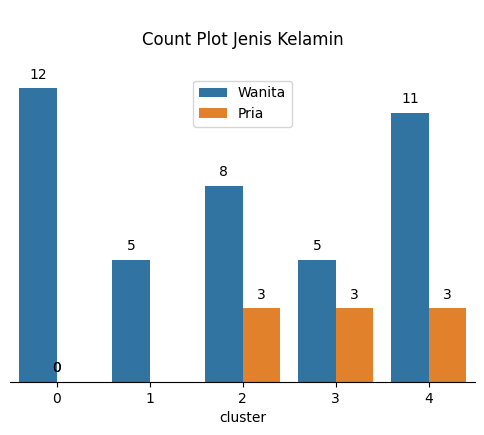

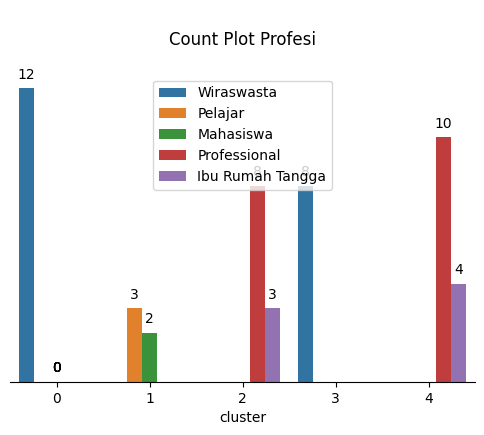

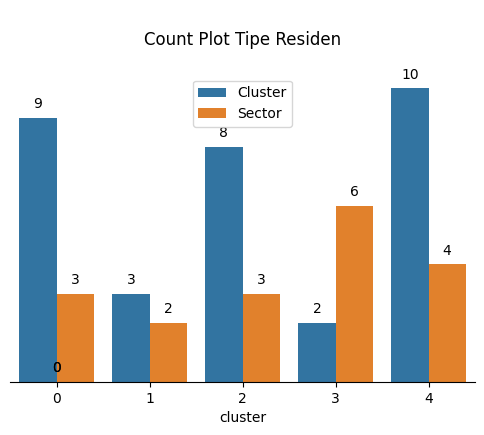

In [54]:
import matplotlib.pyplot as plt
# Data Kategorikal
kolom_categorical = ['Jenis Kelamin','Profesi','Tipe Residen']

for i in kolom_categorical:
    plt.figure(figsize=(6,4))
    ax = sns.countplot(data = df_final, x = 'cluster', hue = i )
    plt.title('\nCount Plot {}\n'.format(i), fontsize=12)
    ax.legend (loc="upper center")
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center',
                     va = 'center',
                     xytext = (0, 10),
                     textcoords = 'offset points')

    sns.despine(right=True,top = True, left = True)
    ax.axes.yaxis.set_visible(False)
    plt.show()

# **Penamaan Cluster Berdasarkan Karakteristik Pelanggan**

Setiap cluster diberi nama yang merefleksikan profil pelanggan di dalamnya, seperti "Diamond Young Member" atau "Silver Member". Penamaan ini memudahkan komunikasi hasil segmentasi dalam konteks bisnis dan membantu tim pemasaran dalam merancang strategi yang sesuai dengan karakteristik tiap segmen.

In [55]:
# Mapping nama kolom
df_final['segmen'] = df_final['cluster'].map({
    0: 'Diamond Young Member',
    1: 'Diamond Senior Member',
    2: 'Silver Member',
    3: 'Gold Young Member',
    4: 'Gold Senior Member'
})

print(df_final.info())
print(df_final.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer_ID          50 non-null     object
 1   Nama Pelanggan       50 non-null     object
 2   Jenis Kelamin        50 non-null     object
 3   Umur                 50 non-null     int64 
 4   Profesi              50 non-null     object
 5   Tipe Residen         50 non-null     object
 6   NilaiBelanjaSetahun  50 non-null     int64 
 7   cluster              50 non-null     uint16
 8   segmen               50 non-null     object
dtypes: int64(2), object(6), uint16(1)
memory usage: 3.4+ KB
None
  Customer_ID       Nama Pelanggan Jenis Kelamin  Umur       Profesi  \
0    CUST-001         Budi Anggara          Pria    58    Wiraswasta   
1    CUST-002     Shirley Ratuwati        Wanita    14       Pelajar   
2    CUST-003         Agus Cahyono          Pria    48  Professional   
3    

# **Mempersiapkan Data Baru untuk Prediksi Segmentasi**

Data pelanggan baru yang belum memiliki label cluster dipersiapkan dengan melakukan encoding kategori dan standarisasi numerik sesuai dengan skala data pelatihan. Proses ini memastikan data baru dapat diproses dengan model clustering yang sudah ada secara konsisten dan akurat.

In [56]:
# Data Baru
data = [{
    'Customer_ID': 'CUST-100' ,
    'Nama Pelanggan': 'Joko' ,
    'Jenis Kelamin': 'Pria',
    'Umur': 45,
    'Profesi': 'Wiraswasta',
    'Tipe Residen': 'Cluster' ,
    'NilaiBelanjaSetahun': 8230000

}]

# Membuat Data Frame
new_df = pd.DataFrame(data)

# Melihat Data
print(new_df)

  Customer_ID Nama Pelanggan Jenis Kelamin  Umur     Profesi Tipe Residen  \
0    CUST-100           Joko          Pria    45  Wiraswasta      Cluster   

   NilaiBelanjaSetahun  
0              8230000  


# **Menggabungkan hasil dua proses sebelumnya menjadi satu data frame**

Pada tahap ini, hasil prediksi cluster dari model K-Prototypes digabungkan dengan data pelanggan asli untuk membentuk satu kesatuan data yang lengkap. Penggabungan ini memudahkan analisis lanjutan dengan menyertakan label cluster pada setiap pelanggan sehingga dapat dilihat karakteristik dan segmentasi secara bersamaan.

In [57]:
import pandas as pd
import seaborn as sns
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes

df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/customer_segments.txt", sep="\t")

df_model = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/df-customer-segmentation.csv')
kproto = KPrototypes(n_clusters=5, random_state=75)
kproto = kproto.fit(df_model, categorical=[0,1,2])

clusters = kproto.predict(df_model, categorical=[0,1,2])

df_final = df.copy()
df_final['cluster'] = clusters
df_final['segmen'] = df_final['cluster'].map({
    0: 'Diamond Young Member',
    1: 'Diamond Senior Member',
    2: 'Silver Member',
    3: 'Gold Young Member',
    4: 'Gold Senior Member'
})

data = [{
    'Customer_ID': 'CUST-100',
    'Nama Pelanggan': 'Joko',
    'Jenis Kelamin': 'Pria',
    'Umur': 45,
    'Profesi': 'Wiraswasta',
    'Tipe Residen': 'Cluster',
    'NilaiBelanjaSetahun': 8230000
}]
new_df = pd.DataFrame(data)

def data_preprocess(data):
    # Konversi Kategorikal data
    kolom_kategorikal = ['Jenis Kelamin','Tipe Residen','Profesi']

    df_encode = data[kolom_kategorikal].copy()

    ## Jenis Kelamin
    df_encode['Jenis Kelamin'] = df_encode['Jenis Kelamin'].map({
        'Pria': 0,
        'Wanita' : 1
    })

    ## Profesi
    df_encode['Profesi'] = df_encode['Profesi'].map({
        'Ibu Rumah Tangga': 0,
        'Mahasiswa' : 1,
        'Pelajar': 2,
        'Professional': 3,
        'Wiraswasta': 4
    })

    ## Tipe Residen
    df_encode['Tipe Residen'] = df_encode['Tipe Residen'].map({
        'Cluster': 0,
        'Sector' : 1
    })

    # Standardisasi Numerical Data
    kolom_numerik = ['Umur','NilaiBelanjaSetahun']
    df_std = data[kolom_numerik].copy()

    ## Standardisasi Kolom Umur
    df_std['Umur'] = (df['Umur'] - 37.5)/14.7

    ## Standardisasi Kolom Nilai Belanja Setahun
    df_std['NilaiBelanjaSetahun'] = (df_std['NilaiBelanjaSetahun'] - 7069874.8)/2590619.0

    # Menggabungkan Kategorikal dan numerikal data
    df_model = df_encode.merge(df_std, left_index = True,
                           right_index=True, how = 'left')

    return df_model

# Menjalankan fungsi
new_df_model = data_preprocess(new_df)

print(new_df_model)

   Jenis Kelamin  Tipe Residen  Profesi      Umur  NilaiBelanjaSetahun
0              0             0        4  1.394558             0.447818


# **Memanggil Model dan Melakukan Prediksi**

Pada tahap ini, model clustering yang telah disimpan sebelumnya dipanggil kembali menggunakan library pickle untuk melakukan prediksi segmen pada data baru yang sudah diproses. Proses prediksi ini mengelompokkan setiap data pelanggan ke dalam cluster yang sesuai berdasarkan atribut numerik dan kategorikal, sehingga memungkinkan segmentasi pelanggan secara cepat dan konsisten tanpa perlu pelatihan ulang model.

In [58]:
def modelling (data):

    # Memanggil Model
    kpoto = pickle.load(open('cluster.pkl', 'rb'))

    # Melakukan Prediksi
    clusters = kpoto.predict (data,categorical=[0,1,2])

    return clusters

# Menjalankan Fungsi
clusters = modelling(new_df_model)

print(clusters)

[3]


# **Menamakan Segmen**

Setelah cluster pelanggan berhasil diprediksi, setiap cluster diberi nama yang merefleksikan karakteristik dan profil pelanggan di dalamnya, seperti “Diamond Young Member” atau “Silver Students”. Penamaan segmen ini memudahkan interpretasi hasil segmentasi dan komunikasi antar tim bisnis, sehingga strategi pemasaran dapat disesuaikan dengan kebutuhan dan karakteristik tiap segmen pelanggan secara efektif.

In [59]:
def menamakan_segmen (data_asli, clusters):

    # Menggabungkan cluster dan data asli
    final_df = data_asli.copy()
    final_df['cluster'] = clusters

    # Menamakan segmen
    final_df['segmen'] = final_df['cluster'].map({
        0: 'Diamond Young Member',
        1: 'Diamond Senior Member',
        2: 'Silver Students',
        3: 'Gold Young Member',
        4: 'Gold Senior Member'
    })

    return final_df

# Menjalankan Fungsi
new_final_df = menamakan_segmen(new_df,clusters)

print(new_final_df)

  Customer_ID Nama Pelanggan Jenis Kelamin  Umur     Profesi Tipe Residen  \
0    CUST-100           Joko          Pria    45  Wiraswasta      Cluster   

   NilaiBelanjaSetahun  cluster             segmen  
0              8230000        3  Gold Young Member  
